# Comparing circulation pattern and hot extreme characteristics under SSP585 and historical

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import proplot as pplot
import cmaps
import xarray as xr
from scipy.stats import linregress
from matplotlib.patches import Patch
from warnings import simplefilter
import scikits.bootstrap as bootstraps
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
def get_winner_respect_to_reanalyses_avg(domain,forcing):
    if forcing == 'historical':
        work_dir = '/Users/zeqinhuang/Documents/paper/HWdna/procData/som_winner_relative_to_reanalyses_mean_historical_' + domain + '.csv'
    else:
        work_dir = '/Users/zeqinhuang/Documents/paper/HWdna/procData/som_winner_forings_relative_to_reanalyses_mean_' + forcing + '_' + domain + '.csv'
    winner = pd.read_csv(work_dir,index_col=0)
    return winner

## get pattern occurrence
def count_occur(winner_df,target_patt): 
    years = [i[:4] for i in winner_df.index]
    years = pd.Series(years,index=winner_df.index)
    winner_patt_count_1 = pd.DataFrame()
    winner_patt_count_2 = pd.DataFrame()
    winner_patt_count_3 = pd.DataFrame()
    winner_patt_count_4 = pd.DataFrame()
    for c in winner_df.columns[:-1]:
        winner_c_df = winner_df[c]
        winner_patt_count_1[c] = winner_c_df.eq(0).groupby(years).sum()
        winner_patt_count_2[c] = winner_c_df.eq(1).groupby(years).sum()
        winner_patt_count_3[c] = winner_c_df.eq(2).groupby(years).sum()
        winner_patt_count_4[c] = winner_c_df.eq(3).groupby(years).sum()
    if target_patt == 0:
        winner_patt_count = winner_patt_count_1
    elif target_patt == 1:
        winner_patt_count = winner_patt_count_2
    elif target_patt == 2:
        winner_patt_count = winner_patt_count_3
    else:
        winner_patt_count = winner_patt_count_4
    return winner_patt_count

## get pattern persistence, pattern persistence is defined as the average duration of a typical pattern in a year
def pattern_persist_cal(listrand,target_patt): ## target_patt must be on of [0,1,2,3]
    count=1
    consec_list = []
    patt_list = []
    for i in range(len(listrand[:-1])):
        if listrand[i] == listrand[i+1]:
            count+=1
        else:
            consec_list.append(count)
            patt_list.append(listrand[i])
            count=1
    consec_list.append(count)        ## consec_list is a list of the consecutive pattern of the listrand
    patt_list.append(listrand[i+1])  ## patt_list is a list of pattern correspond to consec_list
    patt_consec = pd.DataFrame(list(zip(patt_list,consec_list)),columns=['patt','cons'])
    persist = patt_consec['cons'][patt_consec['patt']==target_patt]
    persist = persist.mean()
    return persist

## get pattern maximum duration
def pattern_maximum_duration_cal(listrand,target_patt): ## target_patt must be on of [0,1,2,3]
    count=1
    consec_list = []
    patt_list = []
    for i in range(len(listrand[:-1])):
        if listrand[i] == listrand[i+1]:
            count+=1
        else:
            consec_list.append(count)
            patt_list.append(listrand[i])
            count=1
    consec_list.append(count)        ## consec_list is a list of the consecutive pattern of the listrand
    patt_list.append(listrand[i+1])  ## patt_list is a list of pattern correspond to consec_list
    patt_consec = pd.DataFrame(list(zip(patt_list,consec_list)),columns=['patt','cons'])
    persist = patt_consec['cons'][patt_consec['patt']==target_patt]
    duration = persist.max()
    return duration

def get_hot_extreme_per_pattern(domain,pattern,forcing): ## pattern must be one of [0,1,2,3]
    path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/hot_extreme_per_pattern_occur_patt' + str(pattern+1) + '_variation_' + forcing + '_' + domain +'.csv'
    hot_extreme_per_pattern = pd.read_csv(path,index_col=0)
    return hot_extreme_per_pattern

def get_hot_extreme_variation(domain,pattern,forcing):
    path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/hot_extreme_patt' + str(pattern+1) + '_occur_variation_' + forcing + '_' + domain +'.csv'
    hot_extreme_variation = pd.read_csv(path,index_col=0)
    return hot_extreme_variation

def get_bootstrap_ci(var_df,highlow,alpha=0.05,n_samples=10000):
    if highlow == 'high':
        border = var_df.apply(lambda x:bootstraps.ci(data=x[~np.isnan(x)],alpha=alpha,n_samples=n_samples)[1],axis=1)
    else:
        border = var_df.apply(lambda x:bootstraps.ci(data=x[~np.isnan(x)],alpha=alpha,n_samples=n_samples)[0],axis=1)
    return border

def get_envolop(var_df,highlow):
    if highlow == 'high':
        quantile = 0.95
    else:
        quantile = 0.05
    var_quantile = var_df.quantile(quantile)
    return var_quantile

def _compute_slope(var):
    mask_var = var[~np.isnan(var)]
    slp = linregress(range(len(mask_var)),mask_var).slope
    return slp


def get_winner_respect_to_reanalyses_avg(domain,forcing):
    if forcing == 'historical':
        work_dir = '/Users/zeqinhuang/Documents/paper/HWdna/procData/som_winner_relative_to_reanalyses_mean_historical_' + domain + '.csv'
    else:
        work_dir = '/Users/zeqinhuang/Documents/paper/HWdna/procData/som_winner_forings_relative_to_reanalyses_mean_' + forcing + '_' + domain + '.csv'
    winner = pd.read_csv(work_dir,index_col=0)
    return winner

## get pattern occurrence
def count_occur(winner_df,target_patt): 
    years = [i[:4] for i in winner_df.index]
    years = pd.Series(years,index=winner_df.index)
    winner_patt_count_1 = pd.DataFrame()
    winner_patt_count_2 = pd.DataFrame()
    winner_patt_count_3 = pd.DataFrame()
    winner_patt_count_4 = pd.DataFrame()
    for c in winner_df.columns:
        winner_c_df = winner_df[c]
        winner_patt_count_1[c] = winner_c_df.eq(0).groupby(years).sum()
        winner_patt_count_2[c] = winner_c_df.eq(1).groupby(years).sum()
        winner_patt_count_3[c] = winner_c_df.eq(2).groupby(years).sum()
        winner_patt_count_4[c] = winner_c_df.eq(3).groupby(years).sum()
    if target_patt == 0:
        winner_patt_count = winner_patt_count_1
    elif target_patt == 1:
        winner_patt_count = winner_patt_count_2
    elif target_patt == 2:
        winner_patt_count = winner_patt_count_3
    else:
        winner_patt_count = winner_patt_count_4
    return winner_patt_count

## get pattern persistence, pattern persistence is defined as the average duration of a typical pattern in a year
def pattern_persist_cal(listrand,target_patt): ## target_patt must be on of [0,1,2,3]
    count=1
    consec_list = []
    patt_list = []
    for i in range(len(listrand[:-1])):
        if listrand[i] == listrand[i+1]:
            count+=1
        else:
            consec_list.append(count)
            patt_list.append(listrand[i])
            count=1
    consec_list.append(count)        ## consec_list is a list of the consecutive pattern of the listrand
    patt_list.append(listrand[i+1])  ## patt_list is a list of pattern correspond to consec_list
    patt_consec = pd.DataFrame(list(zip(patt_list,consec_list)),columns=['patt','cons'])
    persist = patt_consec['cons'][patt_consec['patt']==target_patt]
    persist = persist.mean()
    return persist

## get pattern maximum duration
def pattern_maximum_duration_cal(listrand,target_patt): ## target_patt must be on of [0,1,2,3]
    count=1
    consec_list = []
    patt_list = []
    for i in range(len(listrand[:-1])):
        if listrand[i] == listrand[i+1]:
            count+=1
        else:
            consec_list.append(count)
            patt_list.append(listrand[i])
            count=1
    consec_list.append(count)        ## consec_list is a list of the consecutive pattern of the listrand
    patt_list.append(listrand[i+1])  ## patt_list is a list of pattern correspond to consec_list
    patt_consec = pd.DataFrame(list(zip(patt_list,consec_list)),columns=['patt','cons'])
    persist = patt_consec['cons'][patt_consec['patt']==target_patt]
    duration = persist.max()
    return duration

def get_hot_extreme_per_pattern(domain,pattern,forcing): ## pattern must be one of [0,1,2,3]
    if forcing not in ['era5','jra55','ncep2']:
        path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/hot_extreme_per_pattern_occur_patt' + str(pattern+1) + '_variation_' + forcing + '_' + domain +'.csv'
        hot_extreme_per_pattern = pd.read_csv(path,index_col=0)
    else:
        path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/' + forcing + '_hot_extreme_per_pattern_occur_' + domain +'.csv'
        hot_extreme_per_pattern = pd.read_csv(path,index_col=0)
        hot_extreme_per_pattern = hot_extreme_per_pattern['Pattern' + str(pattern + 1)]
    return hot_extreme_per_pattern

def get_hot_extreme_variation(domain,pattern,forcing):
    path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/hot_extreme_patt' + str(pattern+1) + '_occur_variation_' + forcing + '_' + domain +'.csv'
    hot_extreme_variation = pd.read_csv(path,index_col=0)
    return hot_extreme_variation

def get_bootstrap_ci(var_df,highlow,alpha=0.05,n_samples=10000):
    if highlow == 'high':
        border = var_df.apply(lambda x:bootstraps.ci(data=x[~np.isnan(x)],alpha=alpha,n_samples=n_samples)[1],axis=1)
    else:
        border = var_df.apply(lambda x:bootstraps.ci(data=x[~np.isnan(x)],alpha=alpha,n_samples=n_samples)[0],axis=1)
    return border

def get_envolop(var_df,highlow):
    if highlow == 'high':
        quantile = 0.95
    else:
        quantile = 0.05
    var_quantile = var_df.quantile(quantile)
    return var_quantile

def _compute_slope(var):
    # mask_var = var[~np.isnan(var)]
    var[np.isnan(var)] = 0
    slp = linregress(range(len(var)),var).slope
    return slp
    

In [19]:
regions = ['EU','EAS','WNA']
patt_clss_EU = pd.DataFrame(columns=['forcing','data_run','partition','trend','contribution'])
patt_clss_EAS = pd.DataFrame(columns=['forcing','data_run','partition','trend','contribution'])
patt_clss_WNA = pd.DataFrame(columns=['forcing','data_run','partition','trend','contribution'])

for r in range(len(regions)):

    domain = regions[r]
    dynamic_trend_hist_all_patt = pd.DataFrame()
    dynamic_trend_ssp585_all_patt  = pd.DataFrame()
    thermo_trend_hist_all_patt = pd.DataFrame()
    thermo_trend_ssp585_all_patt  = pd.DataFrame()
    interaction_trend_hist_all_patt = pd.DataFrame()
    interaction_trend_ssp585_all_patt  = pd.DataFrame()

    for i in range(4):
        patt = i
        winner_hist = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='historical')
        winner_hist = winner_hist.drop(['era5','jra55','ncep2'],axis=1)
        patt_occur_hist = count_occur(winner_df=winner_hist,target_patt=patt)
        patt_occur_hist_trend = patt_occur_hist.apply(_compute_slope)
        patt_occur_hist_mean = patt_occur_hist.mean()
        hot_extreme_per_pattern_hist = get_hot_extreme_variation(domain=domain,pattern=patt,forcing='historical')
        hot_extreme_per_pattern_hist = hot_extreme_per_pattern_hist.drop(['era5','jra55','ncep2'],axis=1)
        hot_extreme_per_pattern_hist.index = patt_occur_hist.index
        hot_extreme_per_pattern_hist = hot_extreme_per_pattern_hist / patt_occur_hist
        hot_extreme_per_pattern_hist_trend = hot_extreme_per_pattern_hist.apply(_compute_slope)
        hot_extreme_per_pattern_hist_mean = hot_extreme_per_pattern_hist.mean()

        winner_ssp585 = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='ssp585')
        patt_occur_ssp585 = count_occur(winner_df=winner_ssp585,target_patt=patt)
        patt_occur_ssp585_trend = patt_occur_ssp585.apply(_compute_slope)
        patt_occur_ssp585_mean = patt_occur_ssp585.mean()
        hot_extreme_per_pattern_ssp585 = get_hot_extreme_variation(domain=domain,pattern=patt,forcing='ssp585')
        hot_extreme_per_pattern_ssp585 = hot_extreme_per_pattern_ssp585.fillna(0)
        hot_extreme_per_pattern_ssp585.index = patt_occur_ssp585.index
        hot_extreme_per_pattern_ssp585 = hot_extreme_per_pattern_ssp585 / patt_occur_ssp585
        hot_extreme_per_pattern_ssp585_trend = hot_extreme_per_pattern_ssp585.apply(_compute_slope)
        hot_extreme_per_pattern_ssp585_mean = hot_extreme_per_pattern_ssp585.mean()

        dynamic_trend_hist = patt_occur_hist_trend * hot_extreme_per_pattern_hist_mean
        thermo_trend_hist  = patt_occur_hist_mean * hot_extreme_per_pattern_hist_trend
        interaction_hist =  (hot_extreme_per_pattern_hist - hot_extreme_per_pattern_hist_mean) * (patt_occur_hist - patt_occur_hist_mean)
        interaction_trend_hist = interaction_hist.apply(_compute_slope)
        dynamic_trend_hist_all_patt['patt'+str(i)] = dynamic_trend_hist
        thermo_trend_hist_all_patt['patt'+str(i)] = thermo_trend_hist
        interaction_trend_hist_all_patt['patt'+str(i)] = interaction_trend_hist

        dynamic_trend_ssp585 = patt_occur_ssp585_trend * hot_extreme_per_pattern_ssp585_mean
        thermo_trend_ssp585  = patt_occur_ssp585_mean * hot_extreme_per_pattern_ssp585_trend
        interaction_ssp585 =  (hot_extreme_per_pattern_ssp585 - hot_extreme_per_pattern_ssp585_mean) * (patt_occur_ssp585 - patt_occur_ssp585_mean)
        interaction_trend_ssp585 = interaction_ssp585.apply(_compute_slope)
        dynamic_trend_ssp585_all_patt['patt'+str(i)] = dynamic_trend_ssp585
        thermo_trend_ssp585_all_patt['patt'+str(i)] = thermo_trend_ssp585
        interaction_trend_ssp585_all_patt['patt'+str(i)] = interaction_trend_ssp585

    dynamic_trend_hist_all_patt['sum'] = dynamic_trend_hist_all_patt.sum(axis=1)
    thermo_trend_hist_all_patt['sum'] = thermo_trend_hist_all_patt.sum(axis=1)
    interaction_trend_hist_all_patt['sum'] = interaction_trend_hist_all_patt.sum(axis=1)

    dynamic_trend_ssp585_all_patt['sum'] = dynamic_trend_ssp585_all_patt.sum(axis=1)
    thermo_trend_ssp585_all_patt['sum'] = thermo_trend_ssp585_all_patt.sum(axis=1)
    interaction_trend_ssp585_all_patt['sum'] = interaction_trend_ssp585_all_patt.sum(axis=1)

    ind = 0
    for f in ['historical','ssp585']:
        if f == 'historical':
            dynamic_trend = dynamic_trend_hist_all_patt
            thermo_trend = thermo_trend_hist_all_patt
            interaction_trend = interaction_trend_hist_all_patt
        elif f == 'ssp585':
            dynamic_trend = dynamic_trend_ssp585_all_patt
            thermo_trend = thermo_trend_ssp585_all_patt
            interaction_trend = interaction_trend_ssp585_all_patt
        else:
            pass
        for dataset_run in dynamic_trend.index:
            dynamic_trend_i = dynamic_trend.loc[dataset_run]['sum']
            thermo_trend_i  = thermo_trend.loc[dataset_run]['sum']
            interaction_trend_i = interaction_trend.loc[dataset_run]['sum']
            total_trend_i = dynamic_trend_i + thermo_trend_i + interaction_trend_i
            dynamic_contribution_i = dynamic_trend_i / total_trend_i * 100
            thermo_contribution_i  = thermo_trend_i / total_trend_i * 100
            interaction_contribution_i = interaction_trend_i / total_trend_i * 100

            for partition in ['Dynamic','Thermodynamic','Interaction']:
                forcing_i = f
                dataset_run_i = dataset_run
                partition_i = partition
                if partition == 'Dynamic':
                    trend = dynamic_trend_i
                    contribution = dynamic_contribution_i
                elif partition == 'Thermodynamic':
                    trend = thermo_trend_i
                    contribution = thermo_contribution_i
                elif partition == 'Interaction':
                    trend = interaction_trend_i
                    contribution = interaction_contribution_i
                else:
                    pass
                cursor = pd.DataFrame([[forcing_i,dataset_run_i,partition_i,trend,contribution]],columns=['forcing','data_run','partition','trend','contribution'],index=[ind])
                if r == 0:
                    patt_clss_EU = patt_clss_EU.append(cursor)
                elif r == 1:
                    patt_clss_EAS = patt_clss_EAS.append(cursor)
                else:
                    patt_clss_WNA = patt_clss_WNA.append(cursor)
                ind += 1

            

In [6]:
patt_clss_EU_int = pd.DataFrame(columns=['forcing','data_run','partition','trend','contribution'])
patt_clss_EAS_int = pd.DataFrame(columns=['forcing','data_run','partition','trend','contribution'])
patt_clss_WNA_int = pd.DataFrame(columns=['forcing','data_run','partition','trend','contribution'])

for r in range(len(regions)):

    domain = regions[r]

    dynamic_trend_hist_all_patt = pd.DataFrame()
    dynamic_trend_ssp585_all_patt  = pd.DataFrame()
    thermo_trend_hist_all_patt = pd.DataFrame()
    thermo_trend_ssp585_all_patt  = pd.DataFrame()
    interaction_trend_hist_all_patt = pd.DataFrame()
    interaction_trend_ssp585_all_patt  = pd.DataFrame()

    for i in range(4):
        patt = i
        winner_hist = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='historical')
        winner_hist = winner_hist.drop(['era5','jra55','ncep2'],axis=1)
        patt_occur_hist = count_occur(winner_df=winner_hist,target_patt=patt)
        patt_occur_hist_trend = patt_occur_hist.apply(_compute_slope)
        patt_occur_hist_mean = patt_occur_hist.mean()
        hot_extreme_per_pattern_hist = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='historical')
        hot_extreme_per_pattern_hist.index = patt_occur_hist.index
        hot_extreme_per_pattern_hist_trend = hot_extreme_per_pattern_hist.apply(_compute_slope)
        hot_extreme_per_pattern_hist_mean = hot_extreme_per_pattern_hist.mean()

        winner_ssp585 = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='ssp585')
        patt_occur_ssp585 = count_occur(winner_df=winner_ssp585,target_patt=patt)
        patt_occur_ssp585_trend = patt_occur_ssp585.apply(_compute_slope)
        patt_occur_ssp585_mean = patt_occur_ssp585.mean()
        hot_extreme_per_pattern_ssp585 = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='ssp585')
        hot_extreme_per_pattern_ssp585 = hot_extreme_per_pattern_ssp585.fillna(0)
        hot_extreme_per_pattern_ssp585.index = patt_occur_ssp585.index
        hot_extreme_per_pattern_ssp585_trend = hot_extreme_per_pattern_ssp585.apply(_compute_slope)
        hot_extreme_per_pattern_ssp585_mean = hot_extreme_per_pattern_ssp585.mean()

        dynamic_trend_hist = patt_occur_hist_trend * hot_extreme_per_pattern_hist_mean
        thermo_trend_hist  = patt_occur_hist_mean * hot_extreme_per_pattern_hist_trend
        interaction_hist =  (hot_extreme_per_pattern_hist - hot_extreme_per_pattern_hist_mean) * (patt_occur_hist - patt_occur_hist_mean)
        interaction_trend_hist = interaction_hist.apply(_compute_slope)
        dynamic_trend_hist_all_patt['patt'+str(i)] = dynamic_trend_hist
        thermo_trend_hist_all_patt['patt'+str(i)] = thermo_trend_hist
        interaction_trend_hist_all_patt['patt'+str(i)] = interaction_trend_hist

        dynamic_trend_ssp585 = patt_occur_ssp585_trend * hot_extreme_per_pattern_ssp585_mean
        thermo_trend_ssp585  = patt_occur_ssp585_mean * hot_extreme_per_pattern_ssp585_trend
        interaction_ssp585 =  (hot_extreme_per_pattern_ssp585 - hot_extreme_per_pattern_ssp585_mean) * (patt_occur_ssp585 - patt_occur_ssp585_mean)
        interaction_trend_ssp585 = interaction_ssp585.apply(_compute_slope)
        dynamic_trend_ssp585_all_patt['patt'+str(i)] = dynamic_trend_ssp585
        thermo_trend_ssp585_all_patt['patt'+str(i)] = thermo_trend_ssp585
        interaction_trend_ssp585_all_patt['patt'+str(i)] = interaction_trend_ssp585

    dynamic_trend_hist_all_patt['sum'] = dynamic_trend_hist_all_patt.sum(axis=1)
    thermo_trend_hist_all_patt['sum'] = thermo_trend_hist_all_patt.sum(axis=1)
    interaction_trend_hist_all_patt['sum'] = interaction_trend_hist_all_patt.sum(axis=1)

    dynamic_trend_ssp585_all_patt['sum'] = dynamic_trend_ssp585_all_patt.sum(axis=1)
    thermo_trend_ssp585_all_patt['sum'] = thermo_trend_ssp585_all_patt.sum(axis=1)
    interaction_trend_ssp585_all_patt['sum'] = interaction_trend_ssp585_all_patt.sum(axis=1)

    patt_clss = pd.DataFrame(columns=['forcing','data_run','partition','trend','contribution'])
    ind = 0
    for f in ['historical','ssp585']:
        if f == 'historical':
            dynamic_trend = dynamic_trend_hist_all_patt
            thermo_trend = thermo_trend_hist_all_patt
            interaction_trend = interaction_trend_hist_all_patt
        elif f == 'ssp585':
            dynamic_trend = dynamic_trend_ssp585_all_patt
            thermo_trend = thermo_trend_ssp585_all_patt
            interaction_trend = interaction_trend_ssp585_all_patt
        else:
            pass
        for dataset_run in dynamic_trend.index:
            dynamic_trend_i = dynamic_trend.loc[dataset_run]['sum']
            thermo_trend_i  = thermo_trend.loc[dataset_run]['sum']
            interaction_trend_i = interaction_trend.loc[dataset_run]['sum']
            total_trend_i = dynamic_trend_i + thermo_trend_i + interaction_trend_i
            dynamic_contribution_i = dynamic_trend_i / total_trend_i * 100
            thermo_contribution_i  = thermo_trend_i / total_trend_i * 100
            interaction_contribution_i = interaction_trend_i / total_trend_i * 100

            for partition in ['Dynamic','Thermodynamic','Interaction']:
                forcing_i = f
                dataset_run_i = dataset_run
                partition_i = partition
                if partition == 'Dynamic':
                    trend = dynamic_trend_i
                    contribution = dynamic_contribution_i
                elif partition == 'Thermodynamic':
                    trend = thermo_trend_i
                    contribution = thermo_contribution_i
                elif partition == 'Interaction':
                    trend = interaction_trend_i
                    contribution = interaction_contribution_i
                else:
                    pass
                cursor = pd.DataFrame([[forcing_i,dataset_run_i,partition_i,trend,contribution]],columns=['forcing','data_run','partition','trend','contribution'],index=[ind])
                if r == 0:
                    patt_clss_EU_int = patt_clss_EU_int.append(cursor)
                elif r == 1:
                    patt_clss_EAS_int = patt_clss_EAS_int.append(cursor)
                else:
                    patt_clss_WNA_int = patt_clss_WNA_int.append(cursor)
                ind += 1

****** ****** ****** ****** ****** ******
EU_som occurrence_hist: 26.77
EU_som occurrence_ssp585: 74.26
EU_som persist_hist: 5.37
EU_som persist_ssp585: 24.65
EU_som duration_hist: 11.2
EU_som duration_ssp585: 43.3
****** ****** ****** ****** ****** ******
EU_hot_occurrence_hist: 3.5
EU_hot_occurrence_ssp585: 60.06
EU_hot_intensity_hist: 0.1
EU_hot_intensity_ssp585: 2.91
****** ****** ****** ****** ****** ******
EAS_som occurrence_hist: 25.15
EAS_som occurrence_ssp585: 86.27
EAS_som persist_hist: 3.52
EAS_som persist_ssp585: 47.22
EAS_som duration_hist: 8.09
EAS_som duration_ssp585: 64.39
****** ****** ****** ****** ****** ******
EAS_hot_occurrence_hist: 3.57
EAS_hot_occurrence_ssp585: 65.37
EAS_hot_intensity_hist: 0.09
EAS_hot_intensity_ssp585: 2.41
****** ****** ****** ****** ****** ******
WNA_som occurrence_hist: 14.78
WNA_som occurrence_ssp585: 89.84
WNA_som persist_hist: 3.05
WNA_som persist_ssp585: 67.58
WNA_som duration_hist: 5.72
WNA_som duration_ssp585: 78.0
****** ****** ****

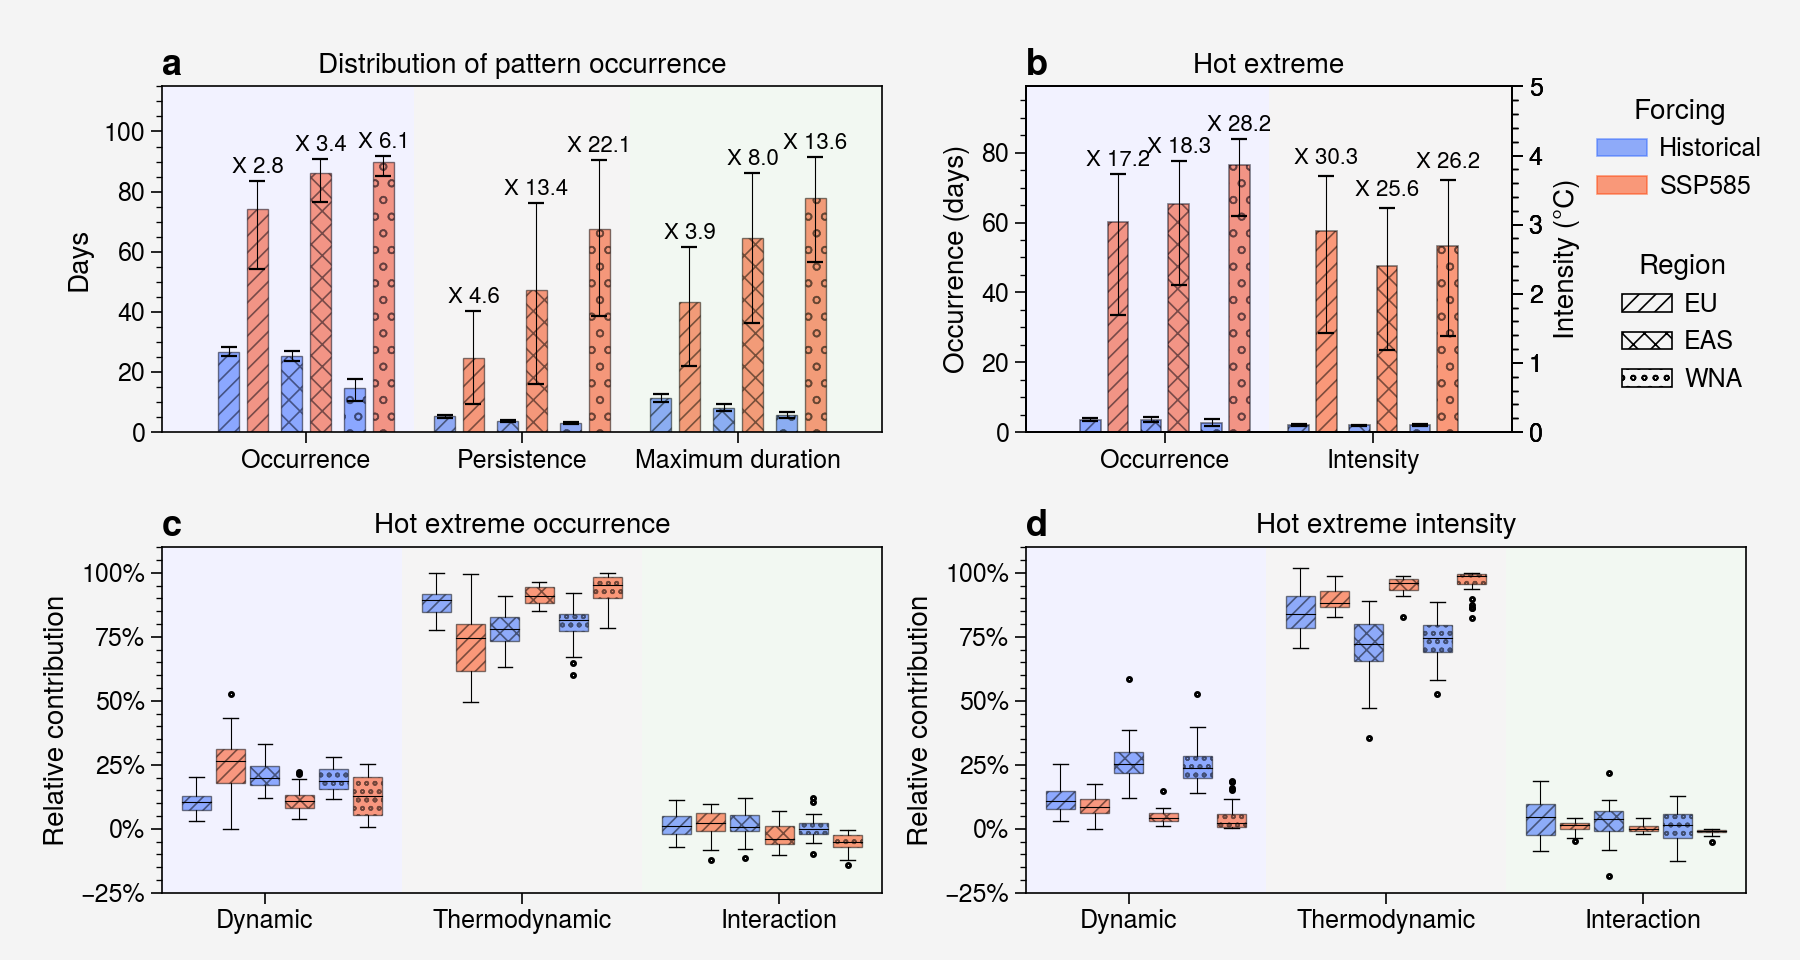

In [29]:
array = [[1,1,1,2,2],[3,3,4,4,0]]
region = ['EU','EAS','WNA']
labels_patt = ['Occurrence','Persistence','Maximum duration']
labels_hot = ['Occurrence','Intensity']
# x_pos_patt = np.arange(len(labels_patt))
x_pos_patt = np.array([0,1.2,2.4])
# x_pos_hot  = np.arange(len(labels_hot))
x_pos_hot  = np.array([0,1.2])
width = 0.2
class_period =['Historical','SSP585']
bar_data_x_patt = [
    x_pos_patt[0] - width/5*2,x_pos_patt[0] + width/5*2,
    x_pos_patt[1] - width/5*2,x_pos_patt[1] + width/5*2,
    x_pos_patt[2] - width/5*2,x_pos_patt[2] + width/5*2]
bar_data_x_hot = [
    x_pos_hot[0] - width/5*2,x_pos_hot[0] + width/5*2,
    x_pos_hot[1] - width/5*2,x_pos_hot[1] + width/5*2]

bar_data_color = ['#2962FF','#FF3D00']
hatchs = ['////','xxx','oo']

# fig, ax = pplot.subplots(array,width=7.5,height=4,sharex=False,sharey=False,wspace=(4))
fig = plt.figure(figsize = (9, 4.8))
ax_anchor = [
    [0.09,0.55,0.4,0.36],
    [0.57,0.55,0.27,0.36],
    [0.09,0.07,0.4,0.36],
    [0.57,0.07,0.4,0.36],
]
abc_label = ['a','b','c','d','f','g','h','i','k','l','m','n']

ax1 = fig.add_axes(ax_anchor[0])
ax2 = fig.add_axes(ax_anchor[1])
ax3 = fig.add_axes(ax_anchor[2])
ax4 = fig.add_axes(ax_anchor[3])

for d in range(len(region)):
    if d == 0:
        domain = 'EU'
        patt = 1
        jitter = -0.35
        hatch = hatchs[0]
    elif d == 1:
        domain = 'EAS'
        patt = 2
        jitter = 0
        hatch = hatchs[1]
    else:
        domain = 'WNA'
        patt = 0
        jitter = 0.35
        hatch = hatchs[2]
    winner_hist = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='historical')
    winner_ssp585 = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='ssp585')
    years_hist = [i[:4] for i in winner_hist.index]
    years_ssp585 = [i[:4] for i in winner_ssp585.index]

    occur_hist = count_occur(winner_hist,target_patt=patt).mean(axis=0)
    occur_ssp585 = count_occur(winner_ssp585,target_patt=patt).mean(axis=0)
    occur_hist_mean = occur_hist.mean()
    occur_ssp585_mean = occur_ssp585.mean()
    occur_hist_mean_mean = occur_hist_mean.mean()
    occur_ssp585_mean_mean = occur_ssp585_mean.mean()
    print('****** ****** ****** ****** ****** ******')
    print(domain + '_som occurrence_hist: ' + str(round(occur_hist_mean_mean,2)))
    print(domain + '_som occurrence_ssp585: ' + str(round(occur_ssp585_mean_mean,2)))
    occur_hist_mean_low = get_envolop(var_df=occur_hist,highlow='low')
    occur_hist_mean_high = get_envolop(var_df=occur_hist,highlow='high')
    occur_ssp585_mean_low = get_envolop(var_df=occur_ssp585,highlow='low')
    occur_ssp585_mean_high = get_envolop(var_df=occur_ssp585,highlow='high')
    
    persist_hist = winner_hist.groupby(years_hist).agg(lambda x: pattern_persist_cal(x,target_patt=patt))
    persist_ssp585 = winner_ssp585.groupby(years_ssp585).agg(lambda x: pattern_persist_cal(x,target_patt=patt))
    persist_hist_mean = persist_hist.mean()
    persist_ssp585_mean = persist_ssp585.mean()
    persist_hist_mean_mean = persist_hist_mean.mean()
    persist_ssp585_mean_mean = persist_ssp585_mean.mean()
    print(domain + '_som persist_hist: ' + str(round(persist_hist_mean_mean,2)))
    print(domain + '_som persist_ssp585: ' + str(round(persist_ssp585_mean_mean,2)))
    persist_hist_mean_low = get_envolop(var_df=persist_hist_mean,highlow='low')
    persist_hist_mean_high = get_envolop(var_df=persist_hist_mean,highlow='high')
    persist_ssp585_mean_low = get_envolop(var_df=persist_ssp585_mean,highlow='low')
    persist_ssp585_mean_high = get_envolop(var_df=persist_ssp585_mean,highlow='high')

    duration_hist = winner_hist.groupby(years_hist).agg(lambda x: pattern_maximum_duration_cal(x,target_patt=patt))
    duration_ssp585 = winner_ssp585.groupby(years_ssp585).agg(lambda x: pattern_maximum_duration_cal(x,target_patt=patt))
    duration_hist_mean = duration_hist.mean()
    duration_ssp585_mean = duration_ssp585.mean()
    duration_hist_mean_mean = duration_hist_mean.mean()
    duration_ssp585_mean_mean = duration_ssp585_mean.mean()
    print(domain + '_som duration_hist: ' + str(round(duration_hist_mean_mean,2)))
    print(domain + '_som duration_ssp585: ' + str(round(duration_ssp585_mean_mean,2)))
    duration_hist_mean_low = get_envolop(var_df=duration_hist_mean,highlow='low')
    duration_hist_mean_high = get_envolop(var_df=duration_hist_mean,highlow='high')
    duration_ssp585_mean_low = get_envolop(var_df=duration_ssp585_mean,highlow='low')
    duration_ssp585_mean_high = get_envolop(var_df=duration_ssp585_mean,highlow='high')
    
    ax1.bar(
        bar_data_x_patt[0] + jitter,occur_hist_mean_mean,yerr=[[occur_hist_mean_mean - occur_hist_mean_low],[occur_hist_mean_high - occur_hist_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',linewidth=0.5,
        alpha=0.5,color=bar_data_color[0],width=width*3/5,capsize=10)
    ax1.bar(
        bar_data_x_patt[1] + jitter,occur_ssp585_mean_mean,yerr=[[occur_ssp585_mean_mean - occur_ssp585_mean_low],[occur_ssp585_mean_high -occur_ssp585_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',linewidth=0.5,
        alpha=0.5,color=bar_data_color[1],width=width*3/5,capsize=10)
    ax1.text(bar_data_x_patt[1] + jitter,occur_ssp585_mean_high + 1,s='X '+str(round(occur_ssp585_mean_mean/occur_hist_mean_mean,1)),horizontalalignment='center',verticalalignment='bottom',fontsize=8)
    ax1.bar(
        bar_data_x_patt[2] + jitter,persist_hist_mean_mean,yerr=[[persist_hist_mean_mean - persist_hist_mean_low],[persist_hist_mean_high - persist_hist_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',linewidth=0.5,
        alpha=0.5,color=bar_data_color[0],width=width*3/5,capsize=10)
    ax1.bar(
        bar_data_x_patt[3] + jitter,persist_ssp585_mean_mean,yerr=[[persist_ssp585_mean_mean - persist_ssp585_mean_low],[persist_ssp585_mean_high - persist_ssp585_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',linewidth=0.5,
        alpha=0.5,color=bar_data_color[1],width=width*3/5,capsize=10)
    ax1.text(bar_data_x_patt[3] + jitter,persist_ssp585_mean_high + 1,s='X '+str(round(persist_ssp585_mean_mean/persist_hist_mean_mean,1)),horizontalalignment='center',verticalalignment='bottom',fontsize=8)
    ax1.bar(
        bar_data_x_patt[4] + jitter,duration_hist_mean_mean,yerr=[[duration_hist_mean_mean - duration_hist_mean_low],[duration_hist_mean_high - duration_hist_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',linewidth=0.5,
        alpha=0.5,color=bar_data_color[0],width=width*3/5,capsize=10)
    ax1.bar(
        bar_data_x_patt[5] + jitter,duration_ssp585_mean_mean,yerr=[[duration_ssp585_mean_mean - duration_ssp585_mean_low],[duration_ssp585_mean_high - duration_ssp585_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',linewidth=0.5,
        alpha=0.5,color=bar_data_color[1],width=width*3/5,capsize=10)
    ax1.text(bar_data_x_patt[5] + jitter,duration_ssp585_mean_high + 1,s='X '+str(round(duration_ssp585_mean_mean/duration_hist_mean_mean,1)),horizontalalignment='center',verticalalignment='bottom',fontsize=8)

    print('****** ****** ****** ****** ****** ******')

    hot_occur_hist = get_hot_extreme_variation(domain=domain,pattern=patt,forcing='historical')
    hot_occur_ssp585 = get_hot_extreme_variation(domain=domain,pattern=patt,forcing='ssp585')
    hot_occur_hist_mean = hot_occur_hist.mean()
    hot_occur_ssp585_mean = hot_occur_ssp585.mean()
    hot_occur_hist_mean_mean = hot_occur_hist_mean.mean()
    hot_occur_ssp585_mean_mean = hot_occur_ssp585_mean.mean()
    print(domain + '_hot_occurrence_hist: ' + str(round(hot_occur_hist_mean_mean,2)))
    print(domain + '_hot_occurrence_ssp585: ' + str(round(hot_occur_ssp585_mean_mean,2)))
    hot_occur_hist_mean_low = get_envolop(var_df=hot_occur_hist_mean,highlow='low')
    hot_occur_hist_mean_high = get_envolop(var_df=hot_occur_hist_mean,highlow='high')
    hot_occur_ssp585_mean_low = get_envolop(var_df=hot_occur_ssp585_mean,highlow='low')
    hot_occur_ssp585_mean_high = get_envolop(var_df=hot_occur_ssp585_mean,highlow='high')
    
    intensity_hist = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='historical')
    intensity_ssp585 = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='ssp585')
    intensity_hist_mean = intensity_hist.mean()
    intensity_ssp585_mean = intensity_ssp585.mean()
    intensity_hist_mean_mean = intensity_hist_mean.mean()
    intensity_ssp585_mean_mean = intensity_ssp585_mean.mean()
    print(domain + '_hot_intensity_hist: ' + str(round(intensity_hist_mean_mean,2)))
    print(domain + '_hot_intensity_ssp585: ' + str(round(intensity_ssp585_mean_mean,2)))
    intensity_hist_mean_low = get_envolop(var_df=intensity_hist_mean,highlow='low')
    intensity_hist_mean_high = get_envolop(var_df=intensity_hist_mean,highlow='high')
    intensity_ssp585_mean_low = get_envolop(var_df=intensity_ssp585_mean,highlow='low')
    intensity_ssp585_mean_high = get_envolop(var_df=intensity_ssp585_mean,highlow='high')
    
    ax2.bar(
        bar_data_x_hot[0] + jitter,hot_occur_hist_mean_mean,yerr=[[hot_occur_hist_mean_mean - hot_occur_hist_mean_low],[hot_occur_hist_mean_high - hot_occur_hist_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',
        alpha=0.5,color=bar_data_color[0],width=width*3/5,capsize=10)
    ax2.bar(
        bar_data_x_hot[1] + jitter,hot_occur_ssp585_mean_mean,yerr=[[hot_occur_ssp585_mean_mean - hot_occur_ssp585_mean_low],[hot_occur_ssp585_mean_high -hot_occur_ssp585_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',
        alpha=0.5,color=bar_data_color[1],width=width*3/5,capsize=10)
    ax2.text(bar_data_x_hot[1] + jitter,hot_occur_ssp585_mean_high + 1,s='X '+str(round(hot_occur_ssp585_mean_mean/hot_occur_hist_mean_mean,1)),horizontalalignment='center',verticalalignment='bottom',fontsize=8)
    ax2_2 = ax2.twinx()
    ax2_2.set_ylim([0,5])
    ax2_2.bar(
        bar_data_x_hot[2] + jitter,intensity_hist_mean_mean,yerr=[[intensity_hist_mean_mean - intensity_hist_mean_low],[intensity_hist_mean_high - intensity_hist_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',
        alpha=0.5,color=bar_data_color[0],width=width*3/5,capsize=10)
    ax2_2.bar(
        bar_data_x_hot[3] + jitter,intensity_ssp585_mean_mean,yerr=[[intensity_ssp585_mean_mean - intensity_ssp585_mean_low],[intensity_ssp585_mean_high - intensity_ssp585_mean_mean]],align='center',
        fill=True,hatch=hatch,error_kw=dict(elinewidth=0.4, capsize=3, capthick=0.8,ecolor='black'),edgecolor='black',
        alpha=0.5,color=bar_data_color[1],width=width*3/5,capsize=10)
    ax2_2.text(bar_data_x_hot[3] + jitter,intensity_ssp585_mean_high + 0.1,s='X '+str(round(intensity_ssp585_mean_mean/intensity_hist_mean_mean,1)),horizontalalignment='center',verticalalignment='bottom',fontsize=8)
    ax2_2.grid(False)

contribution_hist_dynamic_EU = patt_clss_EU[(patt_clss_EU['forcing']=='historical') & (patt_clss_EU['partition']=='Dynamic')]['contribution']
contribution_ssp585_dynamic_EU = patt_clss_EU[(patt_clss_EU['forcing']=='ssp585') & (patt_clss_EU['partition']=='Dynamic')]['contribution']
contribution_hist_dynamic_EAS = patt_clss_EAS[(patt_clss_EAS['forcing']=='historical') & (patt_clss_EAS['partition']=='Dynamic')]['contribution']
contribution_ssp585_dynamic_EAS = patt_clss_EAS[(patt_clss_EAS['forcing']=='ssp585') & (patt_clss_EAS['partition']=='Dynamic')]['contribution']
contribution_hist_dynamic_WNA = patt_clss_WNA[(patt_clss_WNA['forcing']=='historical') & (patt_clss_WNA['partition']=='Dynamic')]['contribution']
contribution_ssp585_dynamic_WNA = patt_clss_WNA[(patt_clss_WNA['forcing']=='ssp585') & (patt_clss_WNA['partition']=='Dynamic')]['contribution']

contribution_hist_thermo_EU = patt_clss_EU[(patt_clss_EU['forcing']=='historical') & (patt_clss_EU['partition']=='Thermodynamic')]['contribution']
contribution_ssp585_thermo_EU = patt_clss_EU[(patt_clss_EU['forcing']=='ssp585') & (patt_clss_EU['partition']=='Thermodynamic')]['contribution']
contribution_hist_thermo_EAS = patt_clss_EAS[(patt_clss_EAS['forcing']=='historical') & (patt_clss_EAS['partition']=='Thermodynamic')]['contribution']
contribution_ssp585_thermo_EAS = patt_clss_EAS[(patt_clss_EAS['forcing']=='ssp585') & (patt_clss_EAS['partition']=='Thermodynamic')]['contribution']
contribution_hist_thermo_WNA = patt_clss_WNA[(patt_clss_WNA['forcing']=='historical') & (patt_clss_WNA['partition']=='Thermodynamic')]['contribution']
contribution_ssp585_thermo_WNA = patt_clss_WNA[(patt_clss_WNA['forcing']=='ssp585') & (patt_clss_WNA['partition']=='Thermodynamic')]['contribution']

contribution_hist_inter_EU = patt_clss_EU[(patt_clss_EU['forcing']=='historical') & (patt_clss_EU['partition']=='Interaction')]['contribution']
contribution_ssp585_inter_EU = patt_clss_EU[(patt_clss_EU['forcing']=='ssp585') & (patt_clss_EU['partition']=='Interaction')]['contribution']
contribution_hist_inter_EAS = patt_clss_EAS[(patt_clss_EAS['forcing']=='historical') & (patt_clss_EAS['partition']=='Interaction')]['contribution']
contribution_ssp585_inter_EAS = patt_clss_EAS[(patt_clss_EAS['forcing']=='ssp585') & (patt_clss_EAS['partition']=='Interaction')]['contribution']
contribution_hist_inter_WNA = patt_clss_WNA[(patt_clss_WNA['forcing']=='historical') & (patt_clss_WNA['partition']=='Interaction')]['contribution']
contribution_ssp585_inter_WNA = patt_clss_WNA[(patt_clss_WNA['forcing']=='ssp585') & (patt_clss_WNA['partition']=='Interaction')]['contribution']


all_data = [
    contribution_hist_dynamic_EU,contribution_ssp585_dynamic_EU,contribution_hist_dynamic_EAS,contribution_ssp585_dynamic_EAS,contribution_hist_dynamic_WNA,contribution_ssp585_dynamic_WNA,
    contribution_hist_thermo_EU,contribution_ssp585_thermo_EU,contribution_hist_thermo_EAS,contribution_ssp585_thermo_EAS,contribution_hist_thermo_WNA,contribution_ssp585_thermo_WNA,
    contribution_hist_inter_EU,contribution_ssp585_inter_EU,contribution_hist_inter_EAS,contribution_ssp585_inter_EAS,contribution_hist_inter_WNA,contribution_ssp585_inter_WNA
    ]
ax3_obj = ax3.boxplot(
    all_data,widths=0.85,flierprops = dict(marker='o', markersize=1.5),patch_artist=True,
    capprops = dict(linestyle='-', linewidth=0.5, color='black'),
    whiskerprops = dict(linestyle='-', linewidth=0.4, color='black'),
    medianprops = dict(linestyle='-', linewidth=0.4, color='black'),
    positions = [1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20])

contribution_hist_dynamic_EU_int = patt_clss_EU_int[(patt_clss_EU_int['forcing']=='historical') & (patt_clss_EU_int['partition']=='Dynamic')]['contribution']
contribution_ssp585_dynamic_EU_int = patt_clss_EU_int[(patt_clss_EU_int['forcing']=='ssp585') & (patt_clss_EU_int['partition']=='Dynamic')]['contribution']
contribution_hist_dynamic_EAS_int = patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='historical') & (patt_clss_EAS_int['partition']=='Dynamic')]['contribution']
contribution_ssp585_dynamic_EAS_int = patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='ssp585') & (patt_clss_EAS_int['partition']=='Dynamic')]['contribution']
contribution_hist_dynamic_WNA_int = patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='historical') & (patt_clss_WNA_int['partition']=='Dynamic')]['contribution']
contribution_ssp585_dynamic_WNA_int = patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='ssp585') & (patt_clss_WNA_int['partition']=='Dynamic')]['contribution']

contribution_hist_thermo_EU_int = patt_clss_EU_int[(patt_clss_EU_int['forcing']=='historical') & (patt_clss_EU_int['partition']=='Thermodynamic')]['contribution']
contribution_ssp585_thermo_EU_int = patt_clss_EU_int[(patt_clss_EU_int['forcing']=='ssp585') & (patt_clss_EU_int['partition']=='Thermodynamic')]['contribution']
contribution_hist_thermo_EAS_int = patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='historical') & (patt_clss_EAS_int['partition']=='Thermodynamic')]['contribution']
contribution_ssp585_thermo_EAS_int = patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='ssp585') & (patt_clss_EAS_int['partition']=='Thermodynamic')]['contribution']
contribution_hist_thermo_WNA_int = patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='historical') & (patt_clss_WNA_int['partition']=='Thermodynamic')]['contribution']
contribution_ssp585_thermo_WNA_int = patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='ssp585') & (patt_clss_WNA_int['partition']=='Thermodynamic')]['contribution']

contribution_hist_inter_EU_int = patt_clss_EU_int[(patt_clss_EU_int['forcing']=='historical') & (patt_clss_EU_int['partition']=='Interaction')]['contribution']
contribution_ssp585_inter_EU_int = patt_clss_EU_int[(patt_clss_EU_int['forcing']=='ssp585') & (patt_clss_EU_int['partition']=='Interaction')]['contribution']
contribution_hist_inter_EAS_int = patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='historical') & (patt_clss_EAS_int['partition']=='Interaction')]['contribution']
contribution_ssp585_inter_EAS_int = patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='ssp585') & (patt_clss_EAS_int['partition']=='Interaction')]['contribution']
contribution_hist_inter_WNA_int = patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='historical') & (patt_clss_WNA_int['partition']=='Interaction')]['contribution']
contribution_ssp585_inter_WNA_int = patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='ssp585') & (patt_clss_WNA_int['partition']=='Interaction')]['contribution']


all_data_int = [
    contribution_hist_dynamic_EU_int,contribution_ssp585_dynamic_EU_int,contribution_hist_dynamic_EAS_int,contribution_ssp585_dynamic_EAS_int,contribution_hist_dynamic_WNA_int,contribution_ssp585_dynamic_WNA_int,
    contribution_hist_thermo_EU_int,contribution_ssp585_thermo_EU_int,contribution_hist_thermo_EAS_int,contribution_ssp585_thermo_EAS_int,contribution_hist_thermo_WNA_int,contribution_ssp585_thermo_WNA_int,
    contribution_hist_inter_EU_int,contribution_ssp585_inter_EU_int,contribution_hist_inter_EAS_int,contribution_ssp585_inter_EAS_int,contribution_hist_inter_WNA_int,contribution_ssp585_inter_WNA_int
    ]
ax4_obj = ax4.boxplot(
    all_data_int,widths=0.85,flierprops = dict(marker='o', markersize=1.5),patch_artist=True,
    capprops = dict(linestyle='-', linewidth=0.5, color='black'),
    whiskerprops = dict(linestyle='-', linewidth=0.4, color='black'),
    medianprops = dict(linestyle='-', linewidth=0.4, color='black'),
    positions = [1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20])


ax1.set_title('Distribution of pattern occurrence',fontdict={'fontsize':10, 'fontweight':'medium'})
ax1.set_ylabel('Days',fontdict={'fontsize':10})
ax1.set_xticks([0,1.2,2.4])
ax1.set_xticklabels(['Occurrence','Persistence','Maximum duration'])
ax1.xaxis.set_tick_params(which='minor', bottom=False) 
ax1.set_ylim([0,115])
ax1.set_xlim([-0.8,3.2])
ax1.bar([-0.1,1.2,2.5],[150,150,150],width=[1.4,1.2,1.4],color=['blue','#4E342E','green'],alpha=0.05)
ax1.text(0, 1.01, 'a', transform=ax1.transAxes, fontsize=13, fontweight='bold', va='bottom', ha='left')
ax1.grid(False)

ax2.set_title('Hot extreme',fontdict={'fontsize':10, 'fontweight':'medium'})
ax2.set_xticks(x_pos_hot)
ax2.set_xticklabels(labels_hot)
ax2.set_ylabel('Occurrence (days)',fontdict={'fontsize':10})
ax2.set_ylim([0,99])
ax2.set_xlim([-0.8,2])
ax2.xaxis.set_tick_params(which='minor', bottom=False)
ax2_2.set_ylabel('Intensity (°C)',fontdict={'fontsize':10})
ax2.bar([-0.1,1.3],[100,100],width=[1.4],color=['blue','#4E342E','green'],alpha=0.05)
ax2.text(0, 1.01, 'b', transform=ax2.transAxes, fontsize=13, fontweight='bold', va='bottom', ha='left')
ax2.grid(False)

ax3.set_title('Hot extreme occurrence',fontdict={'fontsize':10, 'fontweight':'medium'})
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.set_ylabel('Relative contribution',fontdict={'fontsize':10})
ax3.set_ylim([-25,110])
ax3.set_xlim([0,21])
ax3.set_xticks([3,10.5,18])
ax3.set_xticklabels(['Dynamic','Thermodynamic','Interaction'])
ax3.xaxis.set_tick_params(which='minor', bottom=False)
ax3.bar([3,10.5,18],[110,110,110],width=[8,7,8],color=['blue','#4E342E','green'],alpha=0.05)
ax3.bar([3,10.5,18],[-30,-30,-30],width=[8,7,8],color=['blue','#4E342E','green'],alpha=0.05)
ax3.text(0, 1.01, 'c', transform=ax3.transAxes, fontsize=13, fontweight='bold', va='bottom', ha='left')
ax3.grid(False)

ax4.set_title('Hot extreme intensity',fontdict={'fontsize':10, 'fontweight':'medium'})
ax4.yaxis.set_major_formatter(mtick.PercentFormatter())
ax4.set_ylabel('Relative contribution',fontdict={'fontsize':10})
ax4.set_ylim([-25,110])
ax4.set_xlim([0,21])
ax4.set_xticks([3,10.5,18])
ax4.set_xticklabels(['Dynamic','Thermodynamic','Interaction'])
ax4.xaxis.set_tick_params(which='minor', bottom=False)
ax4.bar([3,10.5,18],[110,110,110],width=[8,7,8],color=['blue','#4E342E','green'],alpha=0.05)
ax4.bar([3,10.5,18],[-30,-30,-30],width=[8,7,8],color=['blue','#4E342E','green'],alpha=0.05)
ax4.text(0, 1.01, 'd', transform=ax4.transAxes, fontsize=13, fontweight='bold', va='bottom', ha='left')
ax4.grid(False)

colors = ['#2962FF','#FF3D00','#2962FF','#FF3D00','#2962FF','#FF3D00','#2962FF','#FF3D00','#2962FF','#FF3D00','#2962FF','#FF3D00','#2962FF','#FF3D00','#2962FF','#FF3D00','#2962FF','#FF3D00']
for k, (patch, color) in enumerate(zip(ax3_obj['boxes'], colors)):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
    patch.set_linewidth(0.5)
    patch.set_edgecolor('black')
    patch.set_lw(0.5)
    # patch.set_hatch(['//']) #['////','////','xxx','xxx','oo','oo','////','////','xxx','xxx','oo','oo','////','////','xxx','xxx','oo','oo']
    patch.set(hatch = ['/////','/////','xxxx','xxxx','oooo','oooo','/////','/////','xxxx','xxxx','oooo','oooo','/////','/////','xxxx','xxxx','oooo','oooo'][k])

for k, (patch, color) in enumerate(zip(ax4_obj['boxes'], colors)):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
    patch.set_linewidth(0.5)
    patch.set_edgecolor('black')
    patch.set_lw(0.5)
    # patch.set_hatch(['//']) #['////','////','xxx','xxx','oo','oo','////','////','xxx','xxx','oo','oo','////','////','xxx','xxx','oo','oo']
    patch.set(hatch = ['/////','/////','xxxx','xxxx','oooo','oooo','/////','/////','xxxx','xxxx','oooo','oooo','/////','/////','xxxx','xxxx','oooo','oooo'][k])

legend_elements = [
    Patch(facecolor='#2962FF', edgecolor='#2962FF',label='Historical',alpha=0.5),
    Patch(facecolor='#FF3D00', edgecolor='#FF3D00',label='SSP585',alpha=0.5)]
handles = legend_elements
labels = ['Historical','SSP585'] 
ax1.legend(handles,labels,frameon=False,ncol=1,loc='upper right',bbox_to_anchor=[2.24,1],title='Forcing', title_fontsize = 10)
circ1 = mpatches.Patch(edgecolor='black',fill=False,hatch='////',label='EU')
circ2= mpatches.Patch(edgecolor='black',fill=False,hatch='xxx',label='EAS')
circ3 = mpatches.Patch(edgecolor='black',fill=False,hatch='ooo',label='WNA')
ax2.legend(handles=[circ1,circ2,circ3],frameon=False,ncol=1,fontsize = 'medium', fancybox = True, loc='upper left',bbox_to_anchor=[1.2,0.55],title='Region', title_fontsize = 10)
fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/HWdna_figure_res/'
fig.savefig(fig_dir + "Fig5_future_changes_in_pattern_occurrence_and_associated_hot_extreme.pdf") #, bbox_inches='tight'

In [21]:
print(patt_clss_EU[(patt_clss_EU['forcing']=='historical') & (patt_clss_EU['partition']=='Thermodynamic')]['contribution'].median())
print(patt_clss_EAS[(patt_clss_EAS['forcing']=='historical') & (patt_clss_EAS['partition']=='Thermodynamic')]['contribution'].median())
print(patt_clss_WNA[(patt_clss_WNA['forcing']=='historical') & (patt_clss_WNA['partition']=='Thermodynamic')]['contribution'].median())

89.23946749759054
78.08173507605918
81.55807363280579


In [24]:
print(patt_clss_EU_int[(patt_clss_EU_int['forcing']=='historical') & (patt_clss_EU_int['partition']=='Thermodynamic')]['contribution'].median())
print(patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='historical') & (patt_clss_EAS_int['partition']=='Thermodynamic')]['contribution'].median())
print(patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='historical') & (patt_clss_WNA_int['partition']=='Thermodynamic')]['contribution'].median())

84.05754223577041
72.18812394185021
74.65211976604772


In [22]:
print(patt_clss_EU[(patt_clss_EU['forcing']=='ssp585') & (patt_clss_EU['partition']=='Thermodynamic')]['contribution'].median())
print(patt_clss_EAS[(patt_clss_EAS['forcing']=='ssp585') & (patt_clss_EAS['partition']=='Thermodynamic')]['contribution'].median())
print(patt_clss_WNA[(patt_clss_WNA['forcing']=='ssp585') & (patt_clss_WNA['partition']=='Thermodynamic')]['contribution'].median())

74.68457956972492
90.76129720698336
95.31349978058208


In [23]:
print(patt_clss_EU_int[(patt_clss_EU_int['forcing']=='ssp585') & (patt_clss_EU_int['partition']=='Thermodynamic')]['contribution'].median())
print(patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='ssp585') & (patt_clss_EAS_int['partition']=='Thermodynamic')]['contribution'].median())
print(patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='ssp585') & (patt_clss_WNA_int['partition']=='Thermodynamic')]['contribution'].median())

88.08620808908933
95.8961161012767
98.61741264171285


In [25]:
print(patt_clss_EU[(patt_clss_EU['forcing']=='historical') & (patt_clss_EU['partition']=='Dynamic')]['contribution'].median())
print(patt_clss_EAS[(patt_clss_EAS['forcing']=='historical') & (patt_clss_EAS['partition']=='Dynamic')]['contribution'].median())
print(patt_clss_WNA[(patt_clss_WNA['forcing']=='historical') & (patt_clss_WNA['partition']=='Dynamic')]['contribution'].median())

10.409692500711543
19.726937370442904
18.567996167487507


In [26]:
print(patt_clss_EU[(patt_clss_EU['forcing']=='ssp585') & (patt_clss_EU['partition']=='Dynamic')]['contribution'].median())
print(patt_clss_EAS[(patt_clss_EAS['forcing']=='ssp585') & (patt_clss_EAS['partition']=='Dynamic')]['contribution'].median())
print(patt_clss_WNA[(patt_clss_WNA['forcing']=='ssp585') & (patt_clss_WNA['partition']=='Dynamic')]['contribution'].median())

26.654884331513585
10.769515114904824
12.634188355051315


In [27]:
print(patt_clss_EU_int[(patt_clss_EU_int['forcing']=='historical') & (patt_clss_EU_int['partition']=='Dynamic')]['contribution'].median())
print(patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='historical') & (patt_clss_EAS_int['partition']=='Dynamic')]['contribution'].median())
print(patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='historical') & (patt_clss_WNA_int['partition']=='Dynamic')]['contribution'].median())

10.8657620754709
25.445637683299545
23.6417208475263


In [28]:
print(patt_clss_EU_int[(patt_clss_EU_int['forcing']=='ssp585') & (patt_clss_EU_int['partition']=='Dynamic')]['contribution'].median())
print(patt_clss_EAS_int[(patt_clss_EAS_int['forcing']=='ssp585') & (patt_clss_EAS_int['partition']=='Dynamic')]['contribution'].median())
print(patt_clss_WNA_int[(patt_clss_WNA_int['forcing']=='ssp585') & (patt_clss_WNA_int['partition']=='Dynamic')]['contribution'].median())

8.678235017794206
4.240296318019919
2.4214149381813885
